# A/B Testing Project: recommender_system_test

This project contains the analysis of A/B testing result from an international marketplace. 

## Table of Contents

* [Introduction](#Introduction)
* [Data Pre-processing](#Data-Pre-Processing)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [A/B Testing Results](#A/B-Testing-Results)
* [Conclusions](#Conclusions)

## Introduction

In this project, the technical specification and results of the A/B testing done by the predecessor were given for us to be analyzed.

### Objectives

* To examine the changes related to the introduction of an improved recommendation system.
* To determine the validity of the test results and method.
* To analyze and gain insights from the test results. 

### Steps

* Data pre-processing
* Exploratory data analysis
* Examining A/B test results
* Drawing conclusions

## Data Pre-processing

First step is to import the required modules/libraries.

In [24]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as mth
from scipy import stats as st

There are four datasets which will be loaded for pre-processing.

In [25]:
# Loading the datasets

# 2020 marketing event calendar 
calendar = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')

# all users registered in the online store from December 7-21, 2020
users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')

# all events from new users during December 7, 2020 until January 1,2021
events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')

# table containing the experiment participant list
partic = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')


### `calendar` dataset

In [26]:
# Displaying `calendar` dataset
calendar

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


`calendar` dataset is showing the advertisement campaign event region and time span details and it consists of four columns as follows:
1. `name` — campaign ad/event name
2. `regions` — location where the ad campaign is set up
3. `start_dt` — start date of the campaign
4. `finish_dt` — end date of the campaign

In [27]:
# Displaying basic information of the dataset
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


Initial review of the dataset shows that the data type for both `start_dt` and `finish_dt` column is object which need to be changed into datetime.

In [28]:
# Checking for missing values in `calendar` dataset 
calendar.isna().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

No missing values were found in `calendar` dataset.

### `users` dataset

In [29]:
# Displaying the first 10 rows of `users` dataset
users.head(10)

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
5,137119F5A9E69421,2020-12-07,N.America,iPhone
6,62F0C741CC42D0CC,2020-12-07,APAC,iPhone
7,8942E64218C9A1ED,2020-12-07,EU,PC
8,499AFACF904BBAE3,2020-12-07,N.America,iPhone
9,FFCEA1179C253104,2020-12-07,EU,Android


The dataset consists of four columns as follows:
1. `user_id` 
2. `first_date` — sign up date
3. `region` 
4. `device` — device used when signing up

In [30]:
# Displaying basic information of the dataset
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


Initial review of `users` dataset shows similar issue with the previous dataset where the data type of `first_date` column need to be converted to datetime.

In [31]:
# Changing data type
users['first_date'] = users['first_date'].astype('datetime64[ns]')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [32]:
# Checking for duplicates in the dataset
users.duplicated().sum()

0

No duplicates were found in `users` dataset.

In [33]:
# Checking for unique values
users['region'].unique()

array(['EU', 'N.America', 'APAC', 'CIS'], dtype=object)

All unique values in `region` column are unique, i.e. no mistyped words or words of similar meaning.

In [34]:
# Checking for unique values
users['device'].unique()

array(['PC', 'Android', 'iPhone', 'Mac'], dtype=object)

The same goes for unique values in `device` column.

In [35]:
# Checking for missing values in `users` dataset 
users.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

No missing values were found in `users` dataset.

### `events` dataset

In [36]:
# Displaying the first 10 rows of `events` dataset
events.head(10)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
6,6B2F726BFD5F8220,2020-12-07 11:27:42,purchase,4.99
7,BEB37715AACF53B0,2020-12-07 04:26:15,purchase,4.99
8,B5FA27F582227197,2020-12-07 01:46:37,purchase,4.99
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99


The dataset consists of four columns as follows:
1. `user_id` 
2. `event_dt` — date and time of event
3. `event_name` — the kind of event 
4. `details` — additional data regarding the event (for example: total purchase in USD for 'purchase' event name) 

In [37]:
# Displaying basic information of the dataset
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


<div class="alert alert-warning">
<b>Fachri's comment v.1</b> <a class="tocSkip"></a>

- Coba tambahkan informasi rangkuman data null pada data yang sudah dimuat menggunakan isna atau isnull sehingga rangkuman nilai null pada data lebih intuitif pada saat dibaca.
</div>

`event_dt` column is object while it is supposed to be datetime. `details` column has null values in it. We will check the rows shortly after checking the unique values in `event_name` column. 

In [38]:
# Checking for unique values
events['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

There were four types of event which describe user activities in the platform.

In [39]:
# Displaying rows from `events` dataset where the `details` column has null values.  
events.loc[events['details'].isna()]

,user_id,event_dt,event_name,details
60314,2E1BF1D4C37EA01F,2020-12-07 09:05:47,product_cart,NaN
60315,50734A22C0C63768,2020-12-07 13:24:03,product_cart,NaN
60316,5EB159DA9DC94DBA,2020-12-07 22:54:02,product_cart,NaN
60317,084A22B980BA8169,2020-12-07 15:25:55,product_cart,NaN
60318,0FC21E6F8FAA8DEC,2020-12-07 06:56:27,product_cart,NaN
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


From the filtered table, seems like rows with `event_name` other than *purchase* has no value in `details` column.

In [40]:
# Making sure the values are only in `purchase` column
events.loc[(events['event_name']=='purchase')].shape[0]

60314

All rows with `event_names` other than purchase has no value in `details` column. Now we are going to change the data type of `event_dt` to datetime. 

In [41]:
# Changing data type
events['event_dt'] = events['event_dt'].astype('datetime64[ns]')
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [42]:
# Checking for duplicates in the dataset
events.duplicated().sum()

0

No duplicates were found in `events` dataset.

In [43]:
# Checking the earliest date in the dataset
events['event_dt'].min()

Timestamp('2020-12-07 00:00:33')

Experiment started at 2020-12-07.

In [44]:
# Checking the last date in the dataset
events['event_dt'].max()

Timestamp('2020-12-30 23:36:33')

The last date in the dataset is 2020-12-30, while the experiment ended at 2021-01-01. The dataset is short of two days' data. 

### `partic` dataset

In [45]:
# Displaying the first 10 rows of `partic` dataset
partic.head(10)

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
5,7473E0943673C09E,A,recommender_system_test
6,C46FE336D240A054,A,recommender_system_test
7,92CB588012C10D3D,A,recommender_system_test
8,B3A2485649E4A012,A,recommender_system_test
9,66FC298441D50783,A,recommender_system_test


The dataset consists of three columns as follows:
1. `user_id` 
2. `group` — experiment group the user belongs to 
3. `ab_test` — name of experiment

In [46]:
# Displaying basic information of the dataset
partic.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

No missing values were found in `partic` dataset.

In [47]:
# Checking for unique values
partic['group'].unique()

array(['A', 'B'], dtype=object)

There are only two groups of participants, A and B.

In [48]:
# Checking for unique values
partic['ab_test'].unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

There are two types of experiment in this dataset: *recommender_system_test* and *interface_eu_test*. We will discard rows containing the *interface_eu_test* as those rows are not required in the scope of the analysis. Before that let's check for duplicates in the dataset.

In [49]:
# Checking for duplicates in the dataset
partic.duplicated().sum()

0

No duplicates were found in `partic` dataset. Now we are going to check if any users are present in both tests. 

In [50]:
# Create separate table for each test group
group_A = partic.loc[partic['group']=='A']
group_B = partic.loc[partic['group']=='B']

In [51]:
# Checking if any user is present in both samples
users_double = group_A.merge(group_B, on='user_id', how='inner')
users_double

,user_id,group_x,ab_test_x,group_y,ab_test_y
0,FC3F3E4DA7C85F88,A,recommender_system_test,B,interface_eu_test
1,FE2AF0E94DBD470E,A,recommender_system_test,B,interface_eu_test
2,C5AD06762E628169,A,recommender_system_test,B,interface_eu_test
3,25CE0629AC6B6971,A,recommender_system_test,B,interface_eu_test
4,44EB15AD423DC31C,A,recommender_system_test,B,interface_eu_test
...,...,...,...,...,...
436,EF449601C94D2496,A,interface_eu_test,B,recommender_system_test
437,59D9BD2A3172D3F4,A,interface_eu_test,B,recommender_system_test
438,13FBEB715F4AAE10,A,interface_eu_test,B,recommender_system_test
439,3DEA2F9B3EDA8B91,A,interface_eu_test,B,recommender_system_test


There were 441 users who participated in both *recommender_system_test* and *interface_eu_test*. We actually do not know whether both tests were conducted at the same time. Running multiple experiments at the same time makes it difficult to tell which test has to get credit for a conversion. These users will be removed from the participants.

In [52]:
# Obtain user_id to be removed
remove_users= users_double['user_id']

# Remove rows with user_id that exist in both tests.
partic_new = partic.loc[~partic['user_id'].isin(remove_users)].reset_index(drop=True)
partic_new

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
...,...,...,...
13638,1D302F8688B91781,B,interface_eu_test
13639,3DE51B726983B657,A,interface_eu_test
13640,F501F79D332BE86C,A,interface_eu_test
13641,63FBE257B05F2245,A,interface_eu_test


After removing users who participated in two experiments, we are left with 13,643 users from originally 14,525 users. The next thing to do is to remove users who participated in *interface_eu_test*.

In [53]:
# Removing rows with interface_eu_test
partic_new = partic_new.loc[partic_new['ab_test']=='recommender_system_test'].reset_index(drop=True)
partic_new

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
...,...,...,...
3229,053FB26D6D49EDDC,A,recommender_system_test
3230,9D263B8EF15CF188,B,recommender_system_test
3231,F2FBBA33F37DEC46,A,recommender_system_test
3232,29C92313A98B1176,B,recommender_system_test


The expected experiment participants are 6000 but now we are left with 3234 participants.

## Exploratory Data Analysis

### Conversion 

In this part, we will examine the conversion in each steps of the funnel. First, we are going to add columns related to each users to `events` dataset by performing merge on the available datasets.

In [54]:
# Adding region column from `users` dataset into `events` dataset
events_reg = events.merge(users, on='user_id', how='left')
events_reg

,user_id,event_dt,event_name,details,first_date,region,device
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,N.America,iPhone
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,EU,iPhone
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,N.America,iPhone
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,EU,iPhone
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,EU,Android
...,...,...,...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN,2020-12-07,EU,Android
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN,2020-12-07,EU,PC
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN,2020-12-07,EU,Android
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN,2020-12-07,EU,iPhone


We've just added `region` column into the dataset. Lets do the same thing for `group`.

In [55]:
# Adding `group` column to events_reg dataset
test_events = events_reg.merge(partic_new[['user_id','group']], on='user_id', how='inner')
test_events

,user_id,event_dt,event_name,details,first_date,region,device,group
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,EU,Android,A
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-07,EU,Android,A
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,NaN,2020-12-07,EU,Android,A
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,NaN,2020-12-07,EU,Android,A
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,NaN,2020-12-07,EU,Android,A
...,...,...,...,...,...,...,...,...
21213,1E6B9298415AA97A,2020-12-21 18:20:12,login,NaN,2020-12-21,N.America,Android,B
21214,1E6B9298415AA97A,2020-12-22 03:22:34,login,NaN,2020-12-21,N.America,Android,B
21215,1E6B9298415AA97A,2020-12-23 11:34:53,login,NaN,2020-12-21,N.America,Android,B
21216,1E6B9298415AA97A,2020-12-24 18:45:58,login,NaN,2020-12-21,N.America,Android,B


Now the dataset has contain complete information of each user gathered from several datasets available. We can start to calculate the number of unique users in each step of the funnel.

In [56]:
# Calculating number of unique users in each step
funnel = test_events.pivot_table(index='event_name',values='user_id',aggfunc='nunique')
funnel.columns = ['user_count']
funnel

,user_count
event_name,
login,3233
product_cart,953
product_page,2032
purchase,1001


There were more users in *purchase* than *product_cart event*. This might probably due to more users are making purchases directly from 'buy now' option in the page without adding product to cart prior to purchase.

In [57]:
# Create pivot table with event_name as columns
test_users = test_events.pivot_table(index='user_id', columns='event_name', values='event_dt', aggfunc='min')
test_users

event_name,login,product_cart,product_page,purchase
user_id,,,,
001064FEAAB631A1,2020-12-20 14:43:27,NaT,2020-12-20 14:43:28,NaT
0010A1C096941592,2020-12-17 21:07:27,NaT,2020-12-17 21:07:27,2020-12-17 21:07:27
00341D8401F0F665,2020-12-21 11:14:50,NaT,NaT,NaT
003DF44D7589BBD4,2020-12-17 06:17:49,2020-12-17 06:17:49,2020-12-17 06:17:49,NaT
00505E15A9D81546,2020-12-14 17:28:32,NaT,NaT,NaT
...,...,...,...,...
FF5A1CD38F5DD996,2020-12-21 19:32:01,NaT,2020-12-21 19:32:01,NaT
FF5B24BCE4387F86,2020-12-21 08:46:48,NaT,2020-12-21 08:46:49,2020-12-21 08:46:48
FF825C1D791989B5,2020-12-19 19:29:18,2020-12-19 19:29:18,NaT,NaT


Each row in the `test_users` pivot table represents one unique user. 

Now we are going to find out the number of users in each stage that are actually following the typical sequence from login - product_page - product_cart - purchase.  

In [58]:
# Defining logic condition for events
step_1 = ~test_users['login'].isna()
step_2 = step_1 & (test_users['product_page']>test_users['login'])
step_3 = step_2 & (test_users['product_cart']>test_users['product_page'])
step_4 = step_3 & (test_users['purchase']>test_users['product_cart'])

# Getting the number of users in each step
n_login = test_users[step_1].shape[0]
n_product_page = test_users[step_2].shape[0]
n_product_cart = test_users[step_3].shape[0]
n_purchase = test_users[step_4].shape[0]

# Summarizing the result as dataframe table
funnel_ordered= pd.DataFrame(data = {'event_name':['login','product_page','product_cart','purchase'],'count':[n_login, n_product_page, n_product_cart, n_purchase]})
funnel_ordered

,event_name,count
0,login,3233
1,product_page,1140
2,product_cart,70
3,purchase,1


There were only 1 users who followed the sequence and made it to purchase out of 3233 users who logged in. Let's calculate the total conversion and the conversion in each step of the funnel.

In [59]:
# Calculating total conversion:
total_conv_1= n_login/n_login*100
total_conv_2= n_product_page/n_login*100
total_conv_3= n_product_cart/n_login*100
total_conv_4= n_purchase/n_login*100

# Calculating conversion to next step:
step_conv_1= n_login/n_login*100
step_conv_2= n_product_page/n_login*100
step_conv_3=n_product_cart/n_product_page*100
step_conv_4=n_purchase/n_product_cart*100

# Summarizing in a dataframe
dict = {'event_name':['login','product_page','product_cart','purchase'],
       'total_conversion':[total_conv_1,total_conv_2,total_conv_3,total_conv_4],
       'conversion_to_next_step':[step_conv_1,step_conv_2,step_conv_3,step_conv_4]}
conversion = pd.DataFrame(dict)

# Displaying the table
conversion

,event_name,total_conversion,conversion_to_next_step
0,login,100.000000,100.000000
1,product_page,35.261367,35.261367
2,product_cart,2.165172,6.140351
3,purchase,0.030931,1.428571


The conversion rate based on users who followed the event sequence is very low at 0.03% .

### Distribution of Number of Events per Users

In [60]:
# Calculating number of event for each users
n_event_per_user = test_events.pivot_table(index='user_id',values=['event_name'], aggfunc='count').reset_index()
n_event_per_user.columns = ['user_id', 'number_of_events']
n_event_per_user

,user_id,number_of_events
0,001064FEAAB631A1,6
1,0010A1C096941592,12
2,00341D8401F0F665,2
3,003DF44D7589BBD4,15
4,00505E15A9D81546,5
...,...,...
3229,FF5A1CD38F5DD996,10
3230,FF5B24BCE4387F86,9
3231,FF825C1D791989B5,8
3232,FF8CF7057415EB29,2


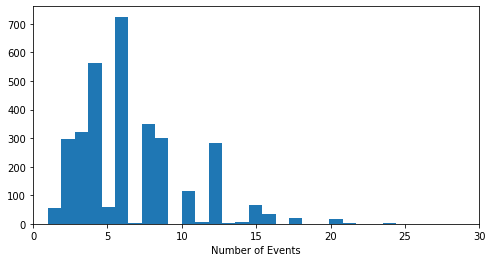

In [61]:
# Plotting histogram for number of events
plt.figure(figsize=(8,4))
plt.hist(n_event_per_user['number_of_events'],bins=30)
plt.xlim(0,30)
plt.xlabel('Number of Events')
plt.show()

The number of events have right skewed distribution. Majority of the users were having 6 number of events each. 

### Checking for Double Presence

Now we are going to make sure that each `user_id` does not belong to two groups at the same time.

In [62]:
# Create separate table for each testing/sample group
group_A = partic_new.loc[partic_new['group']=='A']
group_B = partic_new.loc[partic_new['group']=='B']

In [63]:
# Checking if any user is present in both samples
group_A.merge(group_B, on='user_id', how='inner').shape[0]

0

No users belong to both sample group A and B, thus we can proceed the analysis.

### Event Distribution by Day

A `date` column will be added by extracting only the date part from `event_dt` column. 

In [64]:
# Adding `date` column
test_events['date'] = test_events['event_dt'].dt.date
test_events

,user_id,event_dt,event_name,details,first_date,region,device,group,date
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,EU,Android,A,2020-12-07
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-07,EU,Android,A,2020-12-09
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,NaN,2020-12-07,EU,Android,A,2020-12-07
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,NaN,2020-12-07,EU,Android,A,2020-12-08
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,NaN,2020-12-07,EU,Android,A,2020-12-09
...,...,...,...,...,...,...,...,...,...
21213,1E6B9298415AA97A,2020-12-21 18:20:12,login,NaN,2020-12-21,N.America,Android,B,2020-12-21
21214,1E6B9298415AA97A,2020-12-22 03:22:34,login,NaN,2020-12-21,N.America,Android,B,2020-12-22
21215,1E6B9298415AA97A,2020-12-23 11:34:53,login,NaN,2020-12-21,N.America,Android,B,2020-12-23
21216,1E6B9298415AA97A,2020-12-24 18:45:58,login,NaN,2020-12-21,N.America,Android,B,2020-12-24


In [65]:
# Calculating number of event for each users
n_event_by_date = test_events.pivot_table(index='date',values=['event_name'], aggfunc='count').reset_index()
n_event_by_date.columns = ['date', 'number_of_events']
n_event_by_date

,date,number_of_events
0,2020-12-07,607
1,2020-12-08,525
2,2020-12-09,667
3,2020-12-10,540
4,2020-12-11,473
5,2020-12-12,512
6,2020-12-13,450
7,2020-12-14,1186
8,2020-12-15,1178
9,2020-12-16,1270


There were only two users on 2020-12-30 which is nearly the end of the test period.

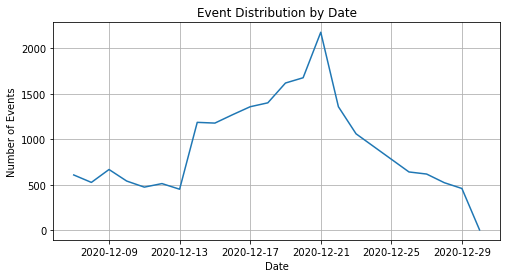

In [66]:
# Plotting event distribution by date
plt.figure(figsize=(8,4))
plt.plot(n_event_by_date['date'],n_event_by_date['number_of_events'])

plt.grid(True)

plt.title('Event Distribution by Date')
plt.xlabel('Date')
plt.ylabel('Number of Events')

plt.show()

From the graph, there is peak of number of events on 2020-12-21 which is highly likely due to seasonal shopping for Christmas/New Year. The number of events declines sharply afterwards.

### Special Characteristics to Consider before A/B Testing

The test was conducted at the period which coincided with holiday season (Christmas). This can significantly influence the test results as we should expect the website experience higher traffic or conversion than usual. In this case, such an experiment may not be reliable for drawing conclusions. Besides, the sample size/number of participants is not as high as expected (less than 6000).

## A/B Testing Results

Expected result: within 14 days of registration, users show an increase in conversions to product page views (product_page), adding items to cart (product_cart), and purchases. At each stage of the product_page → product_cart → purchase funnel, there will be a minimum increase of 10%.

### Calculating Unique Users in Each Group

In [67]:
# Calculating total unique users in each group
exp_users = test_events.pivot_table(index='group', values='user_id', aggfunc='nunique')
exp_users

,user_id
group,
A,2422
B,812


In [68]:
# Calculating proportion in group A and group B
A_size = exp_users.iloc[0]/(exp_users.iloc[0]+exp_users.iloc[1])*100
B_size = 100 - A_size

A_size, B_size

(user_id    74.891775
 dtype: float64,
 user_id    25.108225
 dtype: float64)

The sample proportion is around 75% in group A and 25% in group B. 

In [69]:
# Calculating total unique users in each steps
event_users = test_events.pivot_table(index='event_name', columns='group',values='user_id', aggfunc='nunique')
event_users

group,A,B
event_name,,
login,2422,811
product_cart,728,225
product_page,1571,461
purchase,773,228


The number of unique users in each group for each steps have been calculated. We will use these values for hypothesis test.

### Equality of Proportions Hypothesis Test

Equality of proportions hypothesis test will be conducted to see if there is any significant difference in the sample proportion. The null hypothesis is stated as "There is no significant difference in the proportion of both group." When the test p-value is small, we can reject the null hypothesis and conclude that the populations differ in the proportions in at least one category.

In [73]:
# Creating function for equality of proportions hypothesis test 
def test(successes1, successes2, trials1, trials2, alpha=0.05):
    # Success proportion in the first group
    p1= successes1/trials1
    
    # Success proportion in the second group
    p2= successes2/trials2
    
    # Success proportion in combined group
    p_combined = (successes1 + successes2)/ (trials1 + trials2)
    
    # Proportion difference
    diff = p1-p2
    
    # Calculating the statistic in the standard deviation of the standard normal distribution
    z_value = diff / mth.sqrt(p_combined*(1-p_combined)*(1/trials1 + 1/trials2))
    
    # Setting the standard normal distribution (mean 0, stdev 1)
    distr = st.norm(0,1)
    
    # Calculating the p-value
    p_value = (1- distr.cdf(abs(z_value)))*2
    
    # Displaying the result
    print('p-value: ', p_value)
    if (p_value < alpha):
        print("Reject null hypothesis: There is a significant difference between the proportions.")
    else:
        print("Fail to reject null hypothesis: There is no reason to consider that the proportions are different")

A function for the proportion hypothesis test has been created. Now we are going to prepare one more function for handling the repetitive tasks.

In [74]:
# Creating a function that will run the previously created test function
def check_event_hypothesis(event_users, exp_users, event, group1, group2):
    frac1 = event_users.loc[event, group1] / exp_users.loc[group1]
    frac2 = event_users.loc[event, group2] / exp_users.loc[group2]
    print(f'{frac1} event {event} group {group1}')
    print(f'{frac2} event {event} group {group2}')
    test(event_users.loc[event,group1],
        event_users.loc[event,group2],
        exp_users.loc[group1],
        exp_users.loc[group2],
        )

Let's check the statistical significance for each group.

In [75]:
# Running the function
for event in event_users.index:
    check_event_hypothesis(event_users, exp_users, event, 'A', 'B')
    print('')

user_id    1.0
Name: A, dtype: float64 event login group A
user_id    0.998768
Name: B, dtype: float64 event login group B
p-value:  [0.08410778]
Fail to reject null hypothesis: There is no reason to consider that the proportions are different

user_id    0.300578
Name: A, dtype: float64 event product_cart group A
user_id    0.277094
Name: B, dtype: float64 event product_cart group B
p-value:  [0.20397791]
Fail to reject null hypothesis: There is no reason to consider that the proportions are different

user_id    0.648637
Name: A, dtype: float64 event product_page group A
user_id    0.567734
Name: B, dtype: float64 event product_page group B
p-value:  [3.65197441e-05]
Reject null hypothesis: There is a significant difference between the proportions.

user_id    0.319158
Name: A, dtype: float64 event purchase group A
user_id    0.280788
Name: B, dtype: float64 event purchase group B
p-value:  [0.04068471]
Reject null hypothesis: There is a significant difference between the proportions

There is no significant difference in proportion except for event name *product_page* and *purchase*. Conversion rates for all steps are higher in group A than group B.

## Conclusions

1. The number of unique users who made purchases are more than those who added product to cart. There were possibility that most users were making purchases directly from 'buy now' option in the page.
2. Almost no users were following the complete chronological order of events starting from *login* to *product_page* to *product_cart* and lastly to *purchase*. 
3. There was a spike in number of events on 2021-12-21, which is strongly caused by the proximity of the date to Christmas holiday.
4. There were some shortcomings regarding to how the A/B testing has been conducted, namely:
    * Insufficient number of participants (expected 6000, actual 3234).
    * Testing period coincides with holiday season.
    * Several users were found to be participating in two tests.
4. The results of equality of proportion hypothesis test are showing significant difference in proportion only in *product_page* and *purchase*. However, the improvement in conversion expected in group B is not happening. The control group (group A) has higher conversion rate than the test group (group B) in each step. We cannot conclude that the improvement in the recommendation system is actually contributing to conversion.
5. The A/B testing execution needs to be evaluated for future reference.